In [221]:
import requests
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [222]:

def fetch_data_with_pagination(api_url, start_offset=0, row_limit=5000):
    all_rows = []
    while True:
        # Update the API URL with the current offset
        paginated_url = f"{api_url}&offset={start_offset}&length={row_limit}"
        response = requests.get(paginated_url)
        data = response.json()
        if 'response' in data and 'data' in data['response']:
            rows = data['response']['data']
            all_rows.extend(rows)

            # Break the loop if the number of rows returned is less than the row_limit
            if len(rows) < row_limit:
                break
            else:
                start_offset += row_limit
        else:
            break  # Break the loop if the expected data structure is not present

    return all_rows


base_url = 'https://api.eia.gov/v2/coal/shipments/plant-aggregates/data/?frequency=annual&data[0]=ash-content&data[1]=heat-content&data[2]=price&data[3]=quantity&data[4]=sulfur-content&start=2008&end=2022&sort[0][column]=period&sort[0][direction]=desc&api_key=HiERxZ9fQ1Lrp7k4SqeZiMFvUABbYucBDlqjOgZQ'


data_rows = fetch_data_with_pagination(base_url)

# Convert to DataFrame
df = pd.DataFrame(data_rows)

In [223]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
0,2022,WY,Wyoming,887,Joppa Steam,SUB,Subbituminous,4.83,8890,w,2008507,.22,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
1,2022,PAB,Pennsylvania (Bituminous),56068,Elm Road Generating Station,BIT,Bituminous,7.73,13011,65.85,547351,2.43,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,WVN,West Virginia (Northern),8827,IMT Transfer,BIT,Bituminous,8.66,11634,67.9,1422382,2.97,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,WY,Wyoming,6641,Independence Steam Electric Station,TOT,All,4.74,8921,43.63,3029643,.21,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,WVN,West Virginia (Northern),8226,Cheswick Power Plant,BIT,Bituminous,9.62,12438,w,114628,3.03,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,AZ,Arizona,4941,Navajo,BIT,Bituminous,10.05,10841,35.34,7957644,.56,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,WY,Wyoming,6002,James H Miller Jr,TOT,All,5.02,8700,31.23,12742961,.29,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,KYE,Kentucky (East),10672,Cedar Bay Generating Company LP,TOT,All,12.81,11973,w,933486,.93,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,WVN,West Virginia (Northern),10675,AES Thames,BIT,Bituminous,11.63,12409,w,657652,.99,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [224]:
df.dtypes

period                   object
location                 object
plantStateDescription    object
plant                    object
plantName                object
rank                     object
coalRankDescription      object
ash-content              object
heat-content             object
price                    object
quantity                 object
sulfur-content           object
ash-content-units        object
heat-content-units       object
price-units              object
quantity-units           object
sulfur-content-units     object
dtype: object

In [225]:
# List of columns to convert
columns_to_convert = ['ash-content', 'heat-content', "sulfur-content", "quantity"]  # Replace with your actual column names

# Convert the listed columns to numeric, applying the same function to several columns
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [226]:
df.dtypes

period                    object
location                  object
plantStateDescription     object
plant                     object
plantName                 object
rank                      object
coalRankDescription       object
ash-content              float64
heat-content               int64
price                     object
quantity                   int64
sulfur-content           float64
ash-content-units         object
heat-content-units        object
price-units               object
quantity-units            object
sulfur-content-units      object
dtype: object

In [227]:
df.duplicated().sum()

1098

In [228]:
df.drop_duplicates(inplace=True)

In [229]:
df.isnull().sum()

period                    0
location                  0
plantStateDescription     0
plant                     0
plantName                 0
rank                      0
coalRankDescription       0
ash-content               0
heat-content              0
price                    11
quantity                  0
sulfur-content            0
ash-content-units         0
heat-content-units        0
price-units               0
quantity-units            0
sulfur-content-units      0
dtype: int64

In [230]:
import pandas as pd
import numpy as np


df['price'] = df['price'].replace('w', np.nan, regex=False)


df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Display the updated DataFrame to verify the changes
print(df.head())


  period location      plantStateDescription  plant  \
0   2022       WY                    Wyoming    887   
1   2022      PAB  Pennsylvania (Bituminous)  56068   
2   2022      WVN   West Virginia (Northern)   8827   
3   2022       WY                    Wyoming   6641   
4   2022      WVN   West Virginia (Northern)   8226   

                             plantName rank coalRankDescription  ash-content  \
0                          Joppa Steam  SUB       Subbituminous         4.83   
1          Elm Road Generating Station  BIT          Bituminous         7.73   
2                         IMT Transfer  BIT          Bituminous         8.66   
3  Independence Steam Electric Station  TOT                 All         4.74   
4                 Cheswick Power Plant  BIT          Bituminous         9.62   

   heat-content  price  quantity  sulfur-content  ash-content-units  \
0          8890    NaN   2008507            0.22  percent by weight   
1         13011  65.85    547351            2.

In [231]:
df.dtypes

period                    object
location                  object
plantStateDescription     object
plant                     object
plantName                 object
rank                      object
coalRankDescription       object
ash-content              float64
heat-content               int64
price                    float64
quantity                   int64
sulfur-content           float64
ash-content-units         object
heat-content-units        object
price-units               object
quantity-units            object
sulfur-content-units      object
dtype: object

In [232]:
df.isnull().sum()

period                      0
location                    0
plantStateDescription       0
plant                       0
plantName                   0
rank                        0
coalRankDescription         0
ash-content                 0
heat-content                0
price                    4867
quantity                    0
sulfur-content              0
ash-content-units           0
heat-content-units          0
price-units                 0
quantity-units              0
sulfur-content-units        0
dtype: int64

In [233]:
df['price'] = df['price'].interpolate()

In [234]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
0,2022,WY,Wyoming,887,Joppa Steam,SUB,Subbituminous,4.83,8890,NaN,2008507,0.22,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
1,2022,PAB,Pennsylvania (Bituminous),56068,Elm Road Generating Station,BIT,Bituminous,7.73,13011,65.850000,547351,2.43,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,WVN,West Virginia (Northern),8827,IMT Transfer,BIT,Bituminous,8.66,11634,67.900000,1422382,2.97,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,WY,Wyoming,6641,Independence Steam Electric Station,TOT,All,4.74,8921,43.630000,3029643,0.21,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,WVN,West Virginia (Northern),8226,Cheswick Power Plant,BIT,Bituminous,9.62,12438,57.076667,114628,3.03,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,AZ,Arizona,4941,Navajo,BIT,Bituminous,10.05,10841,35.340000,7957644,0.56,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,WY,Wyoming,6002,James H Miller Jr,TOT,All,5.02,8700,31.230000,12742961,0.29,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,KYE,Kentucky (East),10672,Cedar Bay Generating Company LP,TOT,All,12.81,11973,31.230000,933486,0.93,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,WVN,West Virginia (Northern),10675,AES Thames,BIT,Bituminous,11.63,12409,31.230000,657652,0.99,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [235]:
df.isnull().sum()

period                   0
location                 0
plantStateDescription    0
plant                    0
plantName                0
rank                     0
coalRankDescription      0
ash-content              0
heat-content             0
price                    1
quantity                 0
sulfur-content           0
ash-content-units        0
heat-content-units       0
price-units              0
quantity-units           0
sulfur-content-units     0
dtype: int64

In [236]:
numerical_columns = df.select_dtypes(include=["int", "float"]).columns

In [237]:
correlation = df[numerical_columns].corr()

# Show the correlation matrix
print(correlation)

                ash-content  heat-content     price  quantity  sulfur-content
ash-content        1.000000     -0.031240  0.156155 -0.033528        0.226094
heat-content      -0.031240      1.000000  0.522365 -0.189022        0.551889
price              0.156155      0.522365  1.000000 -0.188731        0.135711
quantity          -0.033528     -0.189022 -0.188731  1.000000        0.059721
sulfur-content     0.226094      0.551889  0.135711  0.059721        1.000000


In [238]:
max_value = max(correlation)
print(max_value) 
min_value = min(correlation)
print(min_value) 

sulfur-content
ash-content


In [239]:
features = df[['sulfur-content', 'heat-content']]

In [240]:
# scaling the data
scaler = StandardScaler()
scaledData = scaler.fit_transform(features)

for col in features.columns:
    df[col] = scaledData[:, features.columns.get_loc(col)]

In [241]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
0,2022,WY,Wyoming,887,Joppa Steam,SUB,Subbituminous,4.83,-1.124332,NaN,2008507,-1.134098,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
1,2022,PAB,Pennsylvania (Bituminous),56068,Elm Road Generating Station,BIT,Bituminous,7.73,1.167828,65.850000,547351,0.865509,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,WVN,West Virginia (Northern),8827,IMT Transfer,BIT,Bituminous,8.66,0.401921,67.900000,1422382,1.354101,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,WY,Wyoming,6641,Independence Steam Electric Station,TOT,All,4.74,-1.107090,43.630000,3029643,-1.143146,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,WVN,West Virginia (Northern),8226,Cheswick Power Plant,BIT,Bituminous,9.62,0.849117,57.076667,114628,1.408389,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,AZ,Arizona,4941,Navajo,BIT,Bituminous,10.05,-0.039158,35.340000,7957644,-0.826466,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,WY,Wyoming,6002,James H Miller Jr,TOT,All,5.02,-1.230013,31.230000,12742961,-1.070762,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,KYE,Kentucky (East),10672,Cedar Bay Generating Company LP,TOT,All,12.81,0.590477,31.230000,933486,-0.491690,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,WVN,West Virginia (Northern),10675,AES Thames,BIT,Bituminous,11.63,0.832987,31.230000,657652,-0.437402,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [38]:
wcss = []
for i in range(2, 15):
    model_kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=10)
    model_kmeans.fit(scaledData)
    wcss.append(model_kmeans.inertia_)

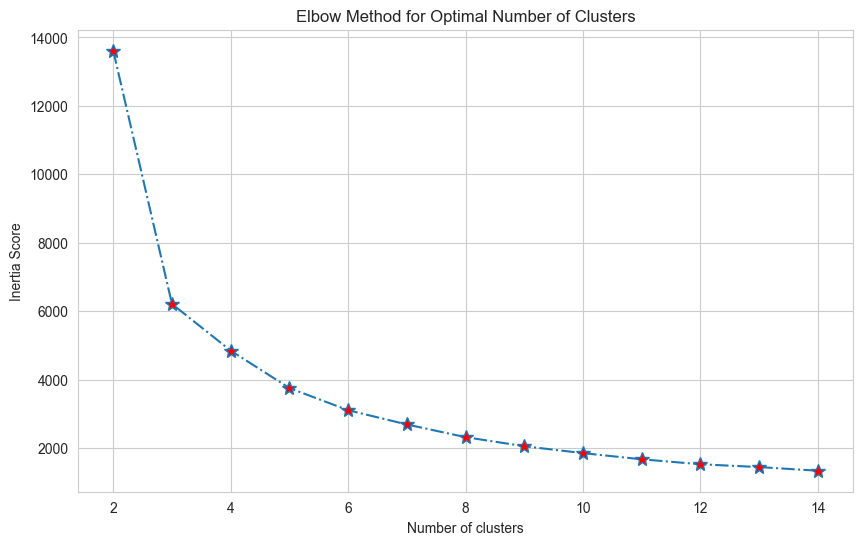

In [39]:
# Elbow Method
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
plt.plot(range(2, 15), wcss, marker='*', linestyle='dashdot', markersize=10, markerfacecolor='r')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.grid(True)
plt.show()

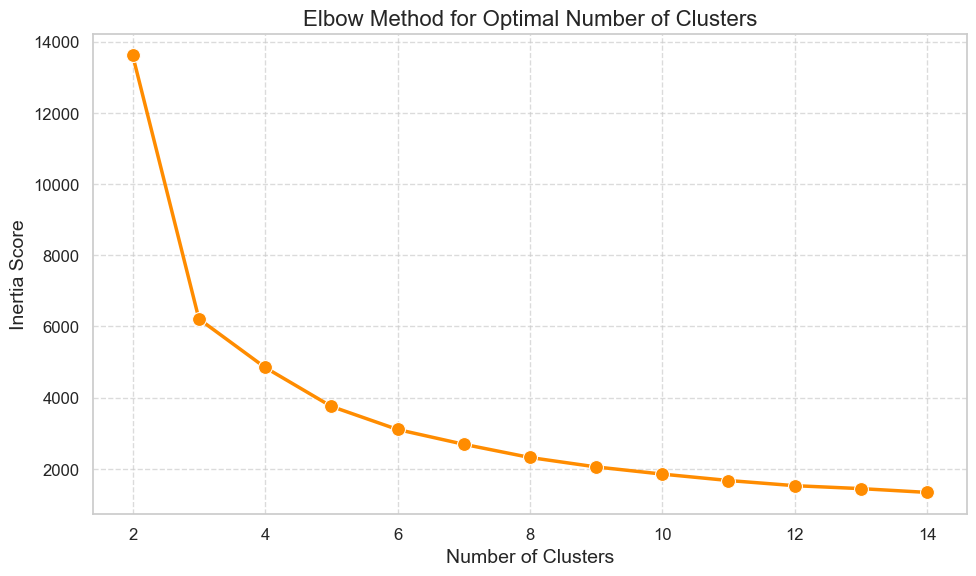

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Plotting inertia scores over cluster count
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 15), y=wcss, marker='o', markersize=10, color='darkorange', linewidth=2.5)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [41]:
silhouette_scores = []
silhouette_scores_dict = {}

for i in range(2, 15):
    model_kmeans = KMeans(n_clusters=i, random_state=10)
    model_kmeans.fit(scaledData)
    cluster_labels = model_kmeans.labels_
    silhouette_average = silhouette_score(scaledData, cluster_labels)
    silhouette_scores.append(silhouette_average)
    silhouette_scores_dict[i] = silhouette_average
    print(f"The silhouette score for {i} clusters is {silhouette_average:.4f}")

C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 2 clusters is 0.5922


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 3 clusters is 0.6016


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 4 clusters is 0.5983


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 5 clusters is 0.5214


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 6 clusters is 0.5093


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 7 clusters is 0.5024


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 8 clusters is 0.4960


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 9 clusters is 0.4991


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 10 clusters is 0.4764


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 11 clusters is 0.4696


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 12 clusters is 0.4652


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 13 clusters is 0.4545


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 14 clusters is 0.4417


In [42]:
silhouette_df = pd.DataFrame(list(silhouette_scores_dict.items()), columns=['Clusters', 'Silhouette Score'])

# Print the DataFrame
print(silhouette_df)

    Clusters  Silhouette Score
0          2          0.592179
1          3          0.601617
2          4          0.598263
3          5          0.521385
4          6          0.509301
5          7          0.502364
6          8          0.495988
7          9          0.499147
8         10          0.476446
9         11          0.469597
10        12          0.465250
11        13          0.454548
12        14          0.441669


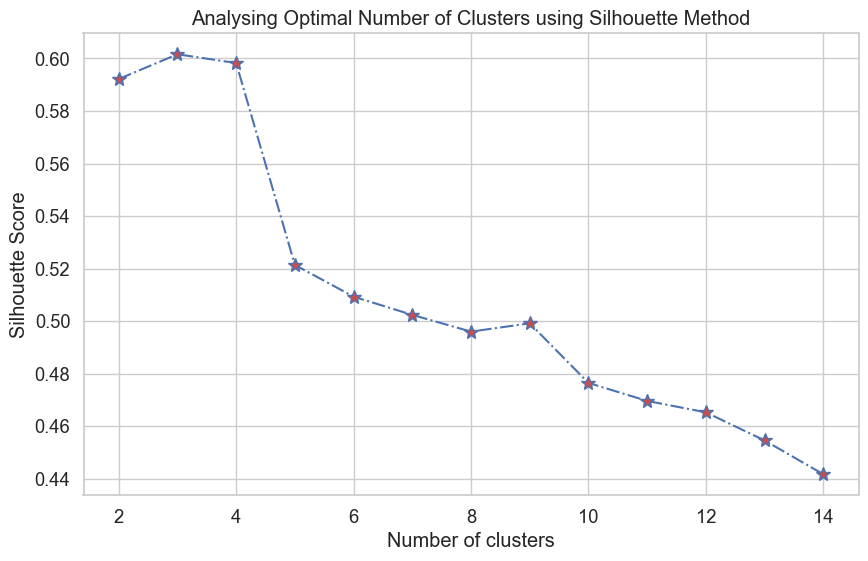

In [43]:
# Plotting silhouette scores over cluster count
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='*', linestyle='dashdot', markersize=10, markerfacecolor='r')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Analysing Optimal Number of Clusters using Silhouette Method')
plt.grid(True)
plt.show()

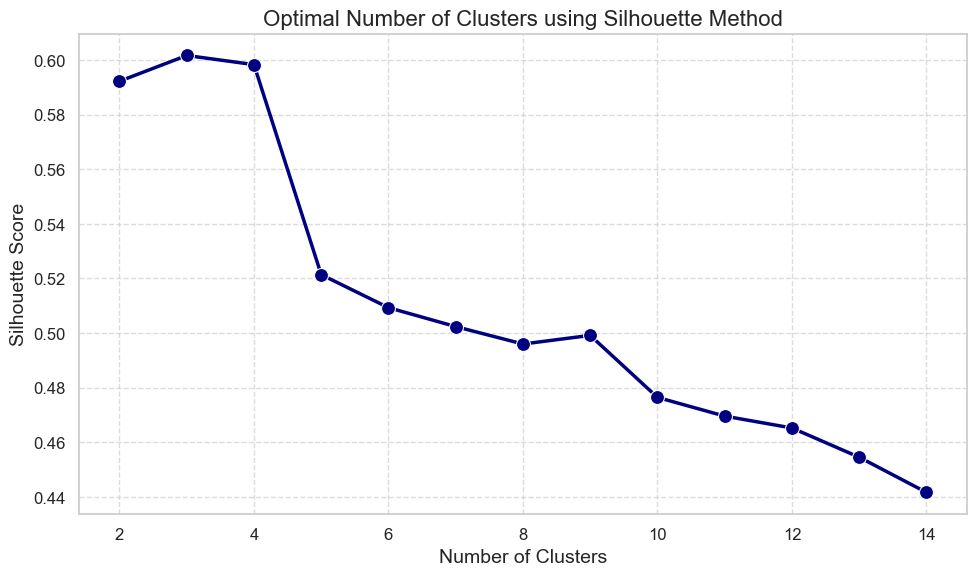

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Plotting silhouette scores over cluster count
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 15), y=silhouette_scores, marker='o', markersize=10, color='navy', linewidth=2.5)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Optimal Number of Clusters using Silhouette Method', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


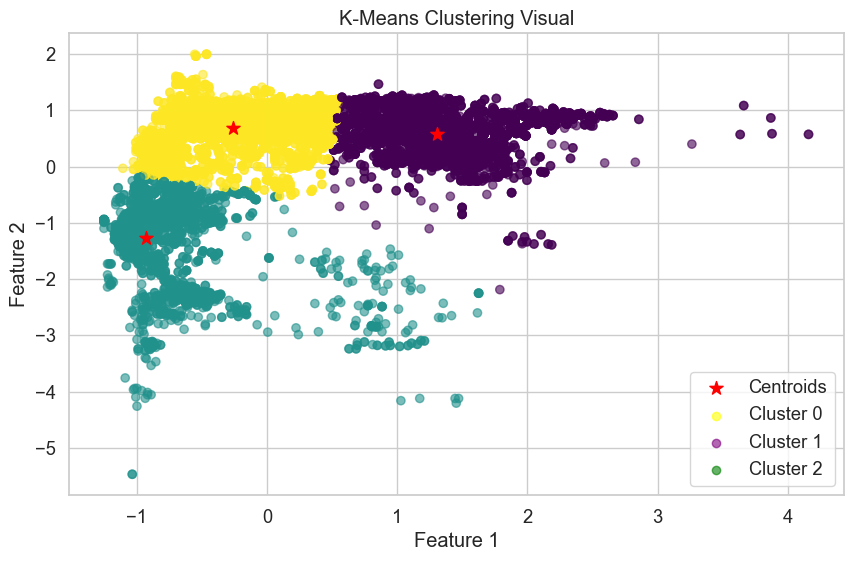

In [45]:
model_kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=10)
model_kmeans.fit(scaledData)
cluster_labels = model_kmeans.labels_
centroids = model_kmeans.cluster_centers_
    
plt.figure(figsize=(10, 6))
scatter = plt.scatter(scaledData[:, 0], scaledData[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='*', label='Centroids')
plt.title('K-Means Clustering Visual')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

colors_label_dict = {0: 'yellow', 1: 'purple', 2: 'green'}

for i in sorted(set(cluster_labels)):
    plt.scatter([], [], c=colors_label_dict[i], alpha=0.6, label=f'Cluster {i}')

plt.legend()
plt.show()

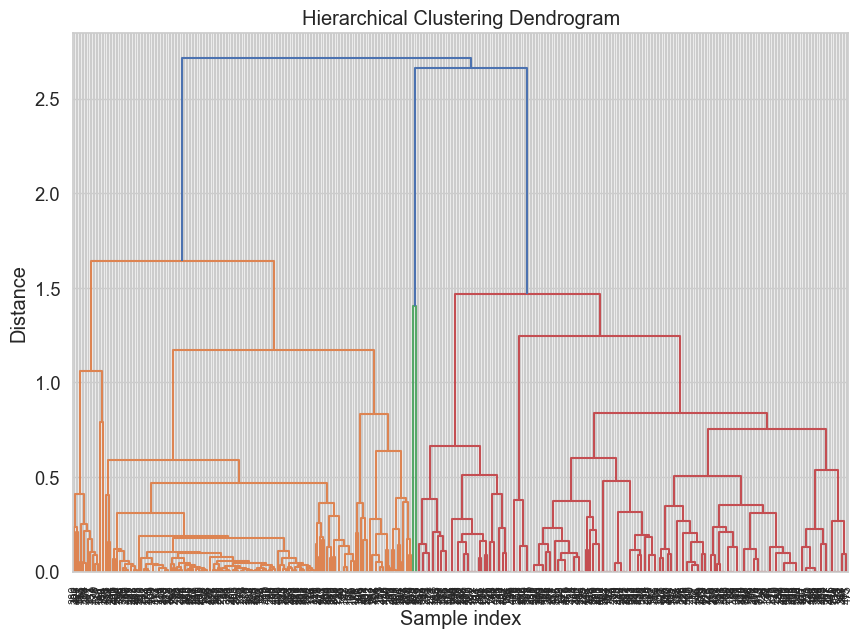

In [46]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

sample_size = 500
X_sampled = scaledData[:sample_size, :]


# Generate the linkage matrix using the 'ward' method
Z = linkage(X_sampled, 'average')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))  # Set the figure size as needed
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8., 
)

plt.show()


#### Naive Bayes:

In [242]:
df.isnull().sum()

period                   0
location                 0
plantStateDescription    0
plant                    0
plantName                0
rank                     0
coalRankDescription      0
ash-content              0
heat-content             0
price                    1
quantity                 0
sulfur-content           0
ash-content-units        0
heat-content-units       0
price-units              0
quantity-units           0
sulfur-content-units     0
dtype: int64

In [243]:
null_rows = df[df.isnull().any(axis=1)]

In [244]:
print(null_rows)

  period location plantStateDescription plant    plantName rank  \
0   2022       WY               Wyoming   887  Joppa Steam  SUB   

  coalRankDescription  ash-content  heat-content  price  quantity  \
0       Subbituminous         4.83     -1.124332    NaN   2008507   

   sulfur-content  ash-content-units heat-content-units  \
0       -1.134098  percent by weight      Btu per pound   

               price-units quantity-units sulfur-content-units  
0  average dollars per ton           tons    percent by weight  


In [245]:
df.dropna(inplace=True)

In [246]:
df.isnull().sum()

period                   0
location                 0
plantStateDescription    0
plant                    0
plantName                0
rank                     0
coalRankDescription      0
ash-content              0
heat-content             0
price                    0
quantity                 0
sulfur-content           0
ash-content-units        0
heat-content-units       0
price-units              0
quantity-units           0
sulfur-content-units     0
dtype: int64

In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

categorical_columns = ['location', 'plantStateDescription', 'plant', 'plantName', 'rank', 'coalRankDescription']

In [248]:
# Encoding categorical variables using Label Encoder
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])


In [249]:
selected_columns = ['period', 'location', 'plantStateDescription', 'plant', 'plantName', 'rank', 'coalRankDescription', 'ash-content',
                   'heat-content', 'price','quantity','sulfur-content']
new_df = df[selected_columns]

In [250]:
new_df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content
1,2022,21,21,339,172,1,2,7.73,1.167828,65.850000,547351,0.865509
2,2022,27,27,492,263,1,2,8.66,0.401921,67.900000,1422382,1.354101
3,2022,29,29,435,267,4,0,4.74,-1.107090,43.630000,3029643,-1.143146
4,2022,27,27,479,97,1,2,9.62,0.849117,57.076667,114628,1.408389
5,2022,17,17,474,213,1,2,9.50,0.900289,70.523333,4596047,2.213661
...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,3,2,305,385,1,2,10.05,-0.039158,35.340000,7957644,-0.826466
19750,2008,29,29,359,283,4,0,5.02,-1.230013,31.230000,12742961,-1.070762
19751,2008,8,8,40,86,4,0,12.81,0.590477,31.230000,933486,-0.491690
19752,2008,27,27,42,10,1,2,11.63,0.832987,31.230000,657652,-0.437402


In [251]:
# Split the data into features and target
X = new_df.drop('rank', axis=1)  # Assuming 'rank' is the target variable
y = new_df['rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [252]:

print("Train Features:")
print(X_train.head())
print("\nTrain Labels:")
print(y_train.head())

print("\nTest Features:")
print(X_test.head())
print("\nTest Labels:")
print(y_test.head())


Train Features:
      period  location  plantStateDescription  plant  plantName  \
3949    2018         5                      5    469        223   
13859   2010        28                     28    452        123   
2446    2019        21                     21    357        268   
8600    2014        28                     28      7        436   
9168    2013         8                      8     74        134   

       coalRankDescription  ash-content  heat-content       price  quantity  \
3949                     0        15.06      0.365210   85.150000   1650641   
13859                    2        10.54      0.886383  107.840000   1139083   
2446                     0         7.63      1.176727   63.406667     70970   
8600                     2         7.44      1.086621   65.370000     73609   
9168                     0         8.13      0.870809   85.610000   4369103   

       sulfur-content  
3949        -0.021195  
13859       -0.428354  
2446         1.046469  
8600      

In [253]:

train_data = pd.concat([X_train, y_train], axis=1)

test_data = pd.concat([X_test, y_test], axis=1)

In [254]:
train_data


,period,location,plantStateDescription,plant,plantName,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,rank
3949,2018,5,5,469,223,0,15.06,0.365210,85.150000,1650641,-0.021195,4
13859,2010,28,28,452,123,2,10.54,0.886383,107.840000,1139083,-0.428354,1
2446,2019,21,21,357,268,0,7.63,1.176727,63.406667,70970,1.046469,4
8600,2014,28,28,7,436,2,7.44,1.086621,65.370000,73609,-0.518834,1
9168,2013,8,8,74,134,0,8.13,0.870809,85.610000,4369103,0.585021,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11745,2012,29,29,375,386,4,5.21,-1.400215,33.080000,654683,-1.061714,3
12425,2011,19,19,100,376,2,7.90,0.488690,50.333333,32876,-0.410258,1
5473,2016,27,27,424,377,2,8.70,0.988727,52.170000,3090964,2.050797,1
861,2021,21,21,77,219,0,8.82,0.678915,46.160000,4532128,1.372197,4


In [255]:
test_data

,period,location,plantStateDescription,plant,plantName,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,rank
9952,2013,29,29,249,16,4,4.74,-1.166048,34.7800,2573691,-1.125050,3
13595,2011,28,28,96,89,2,7.50,1.194526,66.0350,1493495,0.539781,1
2147,2020,29,29,512,35,0,4.57,-1.250593,43.5275,3581660,-1.143146,4
13220,2011,6,6,196,358,2,9.11,0.550986,60.0700,3191058,1.752213,1
3847,2018,6,6,372,569,0,8.35,0.465885,72.7600,1119661,1.001229,4
...,...,...,...,...,...,...,...,...,...,...,...,...
436,2022,27,27,231,534,0,7.66,1.193414,54.6700,201880,0.720741,4
17596,2009,29,29,63,380,0,4.65,-1.338475,20.3000,1213402,-1.088858,4
18124,2008,29,29,432,270,4,6.18,-1.167161,46.4100,404700,-0.790274,3
10720,2012,28,28,194,83,2,9.68,0.816300,47.2800,2778010,2.213661,1


In [256]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dt_estimator = DecisionTreeClassifier(random_state=0)


selector = RFE(dt_estimator, n_features_to_select=5, step=1)


selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train_selected, y_train)

y_pred = gnb_classifier.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.4980


In [257]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


nb_classifier = GaussianNB(var_smoothing=1e-9)

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")





Accuracy: 0.5004


In [258]:

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.54      0.03      0.06      1304
           2       0.00      0.00      0.00        53
           3       0.27      0.01      0.03       501
           4       0.50      0.97      0.66      1873

    accuracy                           0.50      3731
   macro avg       0.33      0.25      0.19      3731
weighted avg       0.48      0.50      0.36      3731



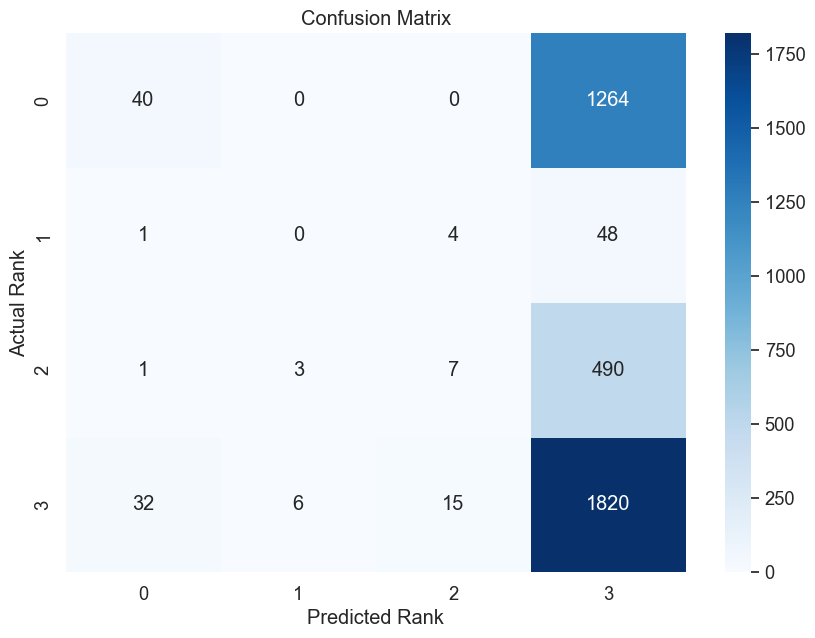

In [259]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Rank')
plt.xlabel('Predicted Rank')
plt.show()

In [260]:
from sklearn.model_selection import GridSearchCV


params_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb = GaussianNB()

gnb_cv = GridSearchCV(estimator=gnb, param_grid=params_grid, cv=5)

gnb_cv.fit(X_train, y_train)


print("Tuned Gaussian Naive Bayes Parameters: {}".format(gnb_cv.best_params_))
print("Best score is {}".format(gnb_cv.best_score_))


Tuned Gaussian Naive Bayes Parameters: {'var_smoothing': 1.0}
Best score is 0.5039533682712041


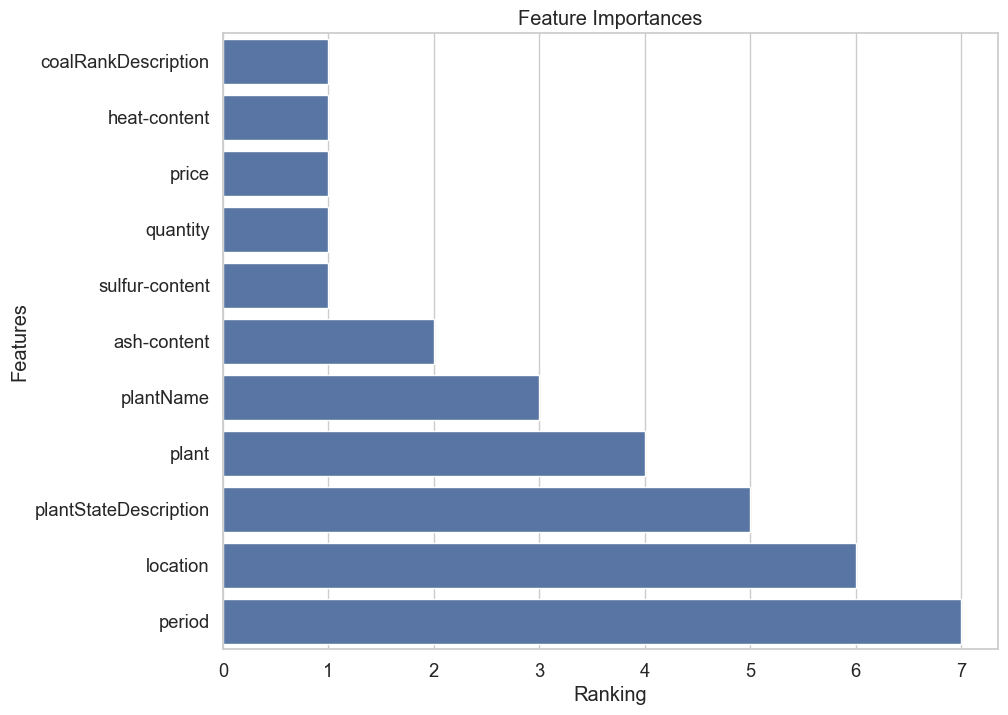

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X_train' is your features DataFrame and 'selector' is the fitted RFE object
feature_rankings = pd.DataFrame({
    'Features': X_train.columns,
    'Rank': selector.ranking_
}).sort_values('Rank')

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_rankings, x='Rank', y='Features')
plt.title('Feature Importances')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.show()


C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_18348\839204569.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=feature_rankings, x='Rank', y='Features', palette="viridis", edgecolor='w')


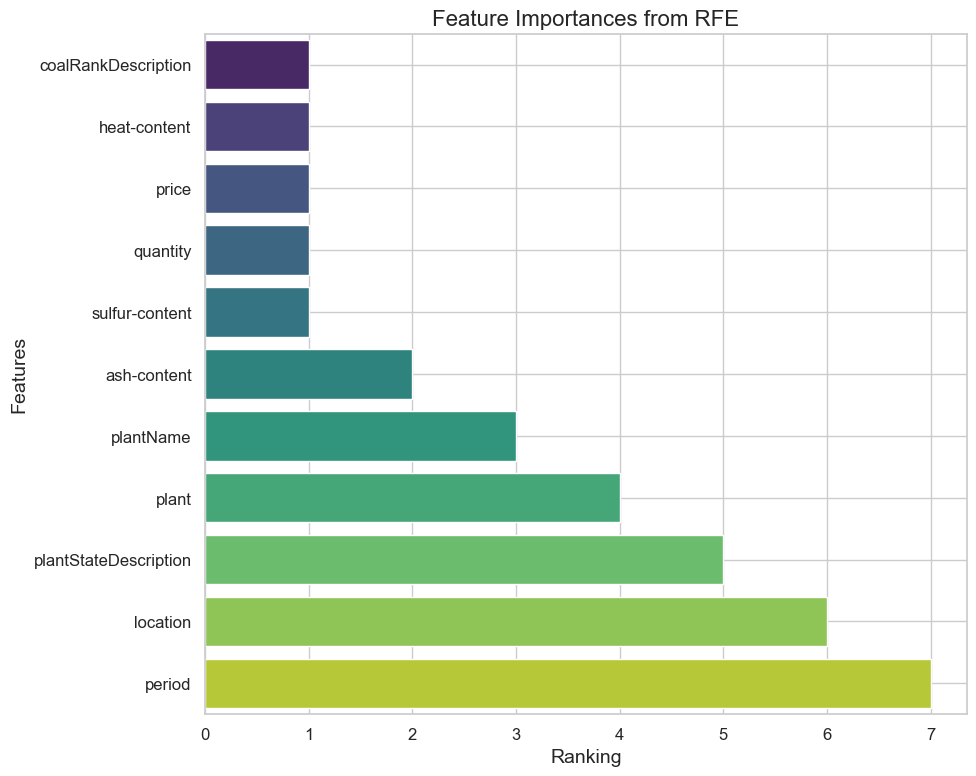

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")

feature_rankings = pd.DataFrame({
    'Features': X_train.columns,
    'Rank': selector.ranking_
}).sort_values('Rank', ascending=True)

plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=feature_rankings, x='Rank', y='Features', palette="viridis", edgecolor='w')


top_features = feature_rankings['Features'].head(5)
for p in barplot.patches:
    if p.get_y() in top_features:
        p.set_color('lightgreen')

plt.title('Feature Importances from RFE', fontsize=16)
plt.xlabel('Ranking', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


#### Decision tree

In [263]:
categorical_columns_DT = ['location', 'plantStateDescription', 'plant', 'plantName', 'rank', 'coalRankDescription']
df[categorical_columns_DT] = df[categorical_columns_DT].apply(lambda x: x.astype('category'))


label_encoders = {}
for column in categorical_columns_DT:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])



In [277]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
1,2022,21,21,339,172,1,2,7.73,1.167828,65.850000,547351,0.865509,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,27,27,492,263,1,2,8.66,0.401921,67.900000,1422382,1.354101,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,29,29,435,267,4,0,4.74,-1.107090,43.630000,3029643,-1.143146,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,27,27,479,97,1,2,9.62,0.849117,57.076667,114628,1.408389,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
5,2022,17,17,474,213,1,2,9.50,0.900289,70.523333,4596047,2.213661,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,3,2,305,385,1,2,10.05,-0.039158,35.340000,7957644,-0.826466,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,29,29,359,283,4,0,5.02,-1.230013,31.230000,12742961,-1.070762,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,8,8,40,86,4,0,12.81,0.590477,31.230000,933486,-0.491690,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,27,27,42,10,1,2,11.63,0.832987,31.230000,657652,-0.437402,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [301]:
selected_columns_DT = ['period', 'location', 'plantStateDescription', 'plant', 'plantName', 'rank', 'coalRankDescription', 'ash-content',
                   'heat-content', 'price','quantity','sulfur-content']
new_df_DT = df[selected_columns_DT]

In [302]:
new_df_DT

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content
1,2022,21,21,339,172,1,2,7.73,1.167828,65.850000,547351,0.865509
2,2022,27,27,492,263,1,2,8.66,0.401921,67.900000,1422382,1.354101
3,2022,29,29,435,267,4,0,4.74,-1.107090,43.630000,3029643,-1.143146
4,2022,27,27,479,97,1,2,9.62,0.849117,57.076667,114628,1.408389
5,2022,17,17,474,213,1,2,9.50,0.900289,70.523333,4596047,2.213661
...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,3,2,305,385,1,2,10.05,-0.039158,35.340000,7957644,-0.826466
19750,2008,29,29,359,283,4,0,5.02,-1.230013,31.230000,12742961,-1.070762
19751,2008,8,8,40,86,4,0,12.81,0.590477,31.230000,933486,-0.491690
19752,2008,27,27,42,10,1,2,11.63,0.832987,31.230000,657652,-0.437402


In [310]:

X = new_df_DT.drop(['plantStateDescription'], axis=1)
y = new_df_DT['plantStateDescription']

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, X_train and X_test are ready for training and testing the Decision Tree model

In [311]:
train_data = pd.concat([X_train, y_train], axis=1)

test_data = pd.concat([X_test, y_test], axis=1)



In [312]:
train_data

,period,location,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,plantStateDescription
17086,2009,27,107,274,4,0,5.35,-1.001409,41.210000,5328795,-1.052666,27
11960,2011,29,381,218,3,4,4.99,-1.347374,16.360000,5626122,-1.079810,29
15880,2009,21,474,214,4,0,8.77,0.512051,50.640000,9727700,1.535061,21
2090,2020,8,6,331,1,2,8.37,1.006526,48.685000,194668,-0.012147,8
18714,2008,29,412,238,4,0,5.03,-1.168273,26.930000,4350517,-1.116002,29
...,...,...,...,...,...,...,...,...,...,...,...,...
11745,2012,29,375,386,3,4,5.21,-1.400215,33.080000,654683,-1.061714,29
12425,2011,19,100,376,1,2,7.90,0.488690,50.333333,32876,-0.410258,19
5473,2016,27,424,377,1,2,8.70,0.988727,52.170000,3090964,2.050797,27
861,2021,21,77,219,4,0,8.82,0.678915,46.160000,4532128,1.372197,21


In [313]:
test_data

,period,location,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,plantStateDescription
9952,2013,29,249,16,3,4,4.74,-1.166048,34.7800,2573691,-1.125050,29
13595,2011,28,96,89,1,2,7.50,1.194526,66.0350,1493495,0.539781,28
2147,2020,29,512,35,4,0,4.57,-1.250593,43.5275,3581660,-1.143146,29
13220,2011,6,196,358,1,2,9.11,0.550986,60.0700,3191058,1.752213,6
3847,2018,6,372,569,4,0,8.35,0.465885,72.7600,1119661,1.001229,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4845,2017,27,371,228,4,0,11.95,0.315151,44.9600,3311080,1.797453,27
2011,2020,29,106,141,4,0,4.58,-1.106533,36.9200,1013460,-1.143146,29
12120,2011,5,446,56,4,0,10.42,0.772916,121.9900,6447589,-0.355970,5
13265,2011,21,366,58,1,2,11.88,0.688927,56.8800,2449913,-0.455498,21


In [314]:
dt_classifier = DecisionTreeClassifier(random_state=12)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00       175
           5       1.00      1.00      1.00       390
           6       1.00      1.00      1.00       290
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00       577
           9       1.00      1.00      1.00       263
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00       162
          15       1.00      1.00      1.00        59
          16       1.00      1.00      1.00        48
          17       1.00    

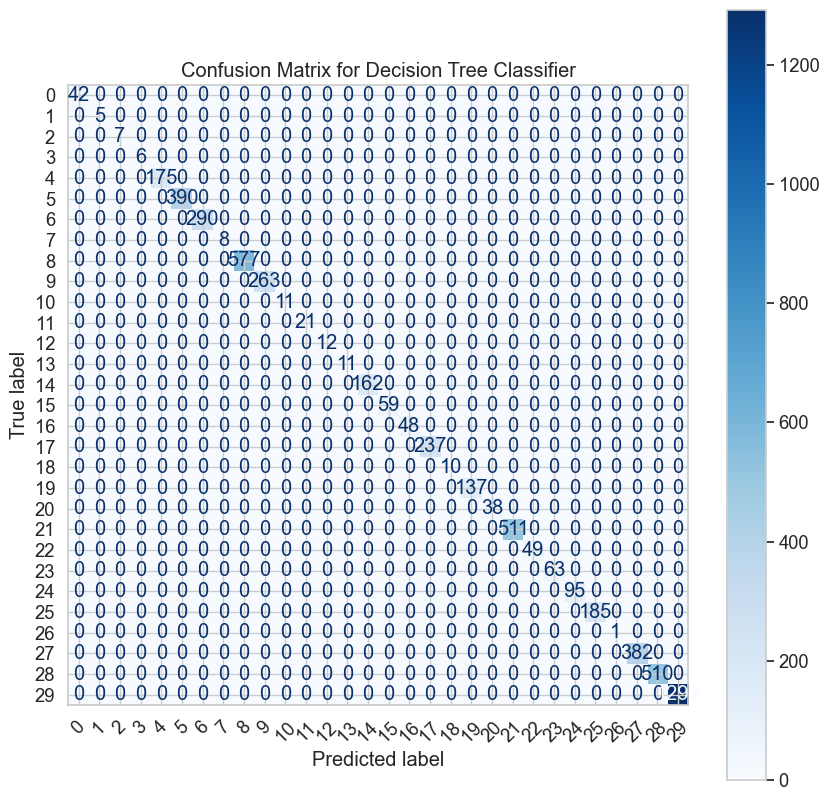

In [315]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # You can adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax)
disp.ax_.set_title('Confusion Matrix for Decision Tree Classifier')

# Optionally add labels (replace with your class names if you have specific ones)
class_names = dt_classifier.classes_
disp.ax_.set_xticklabels(class_names, rotation=45)
disp.ax_.set_yticklabels(class_names)

# Show the plot
plt.show()


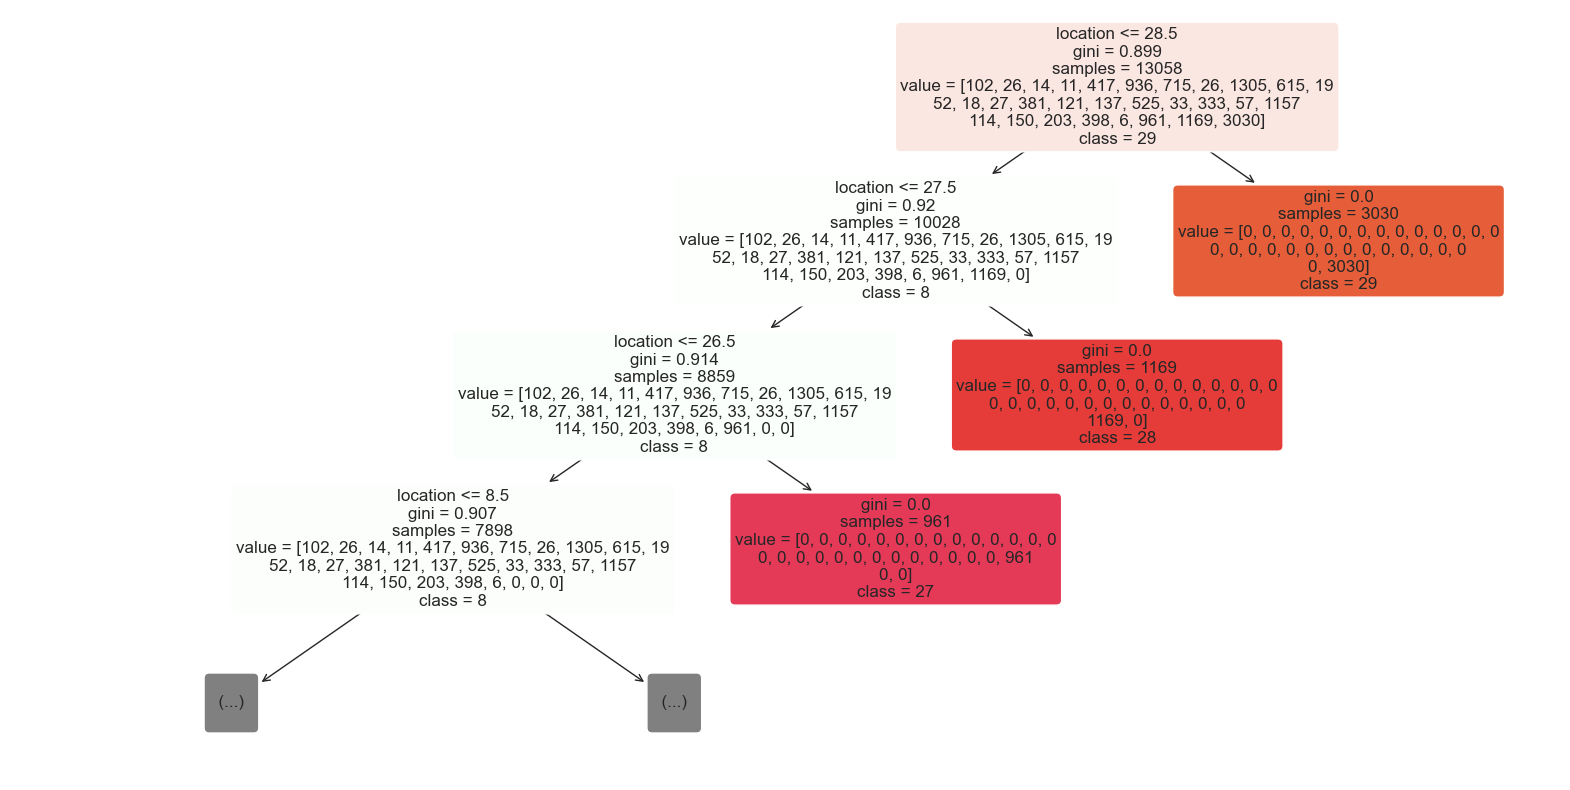

In [316]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree



plt.figure(figsize=(20,10))
plot_tree(dt_classifier, 
          filled=True, 
          rounded=True, 
          class_names=dt_classifier.classes_.astype(str),  
          feature_names=X_train.columns, 
          max_depth=3)  
plt.show()


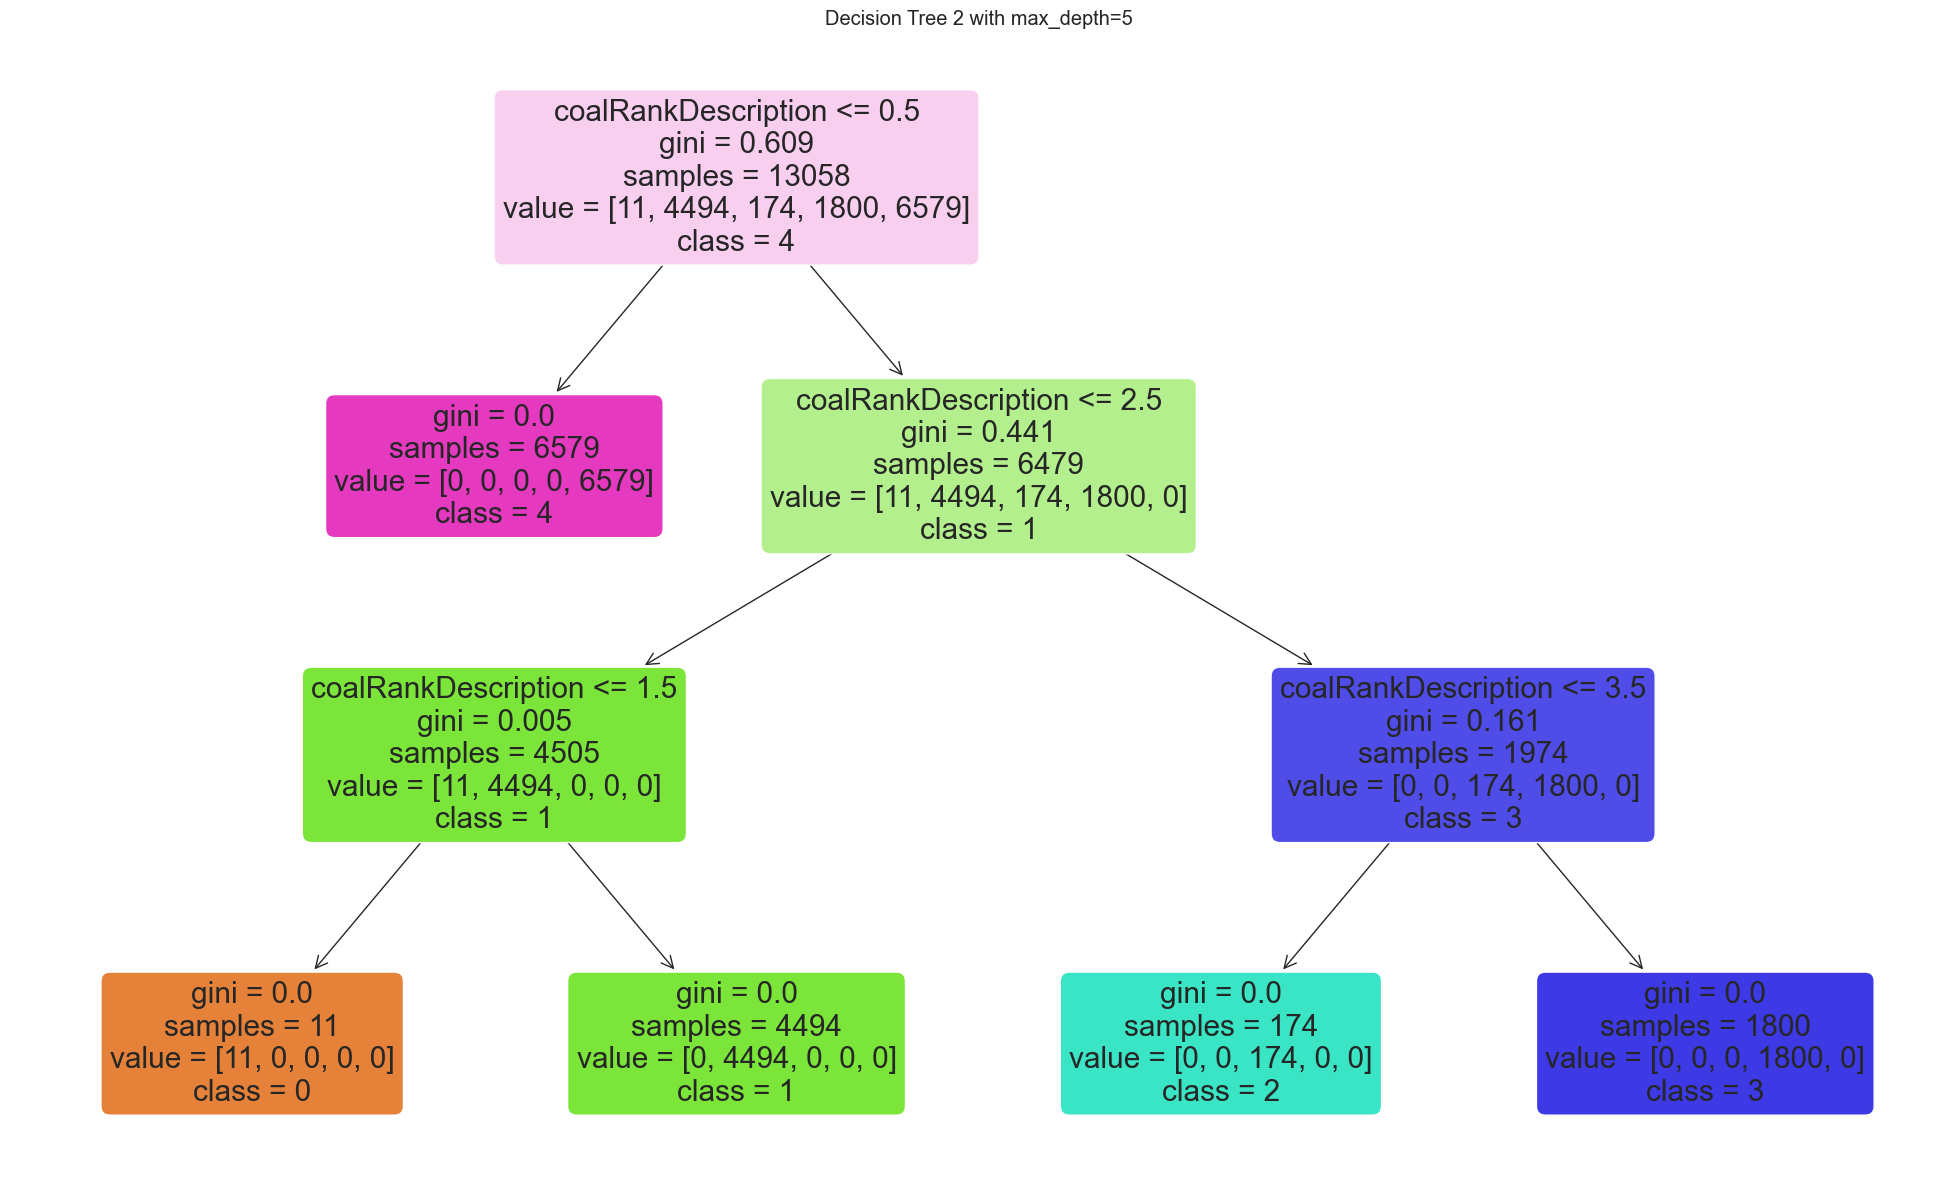

In [298]:
# First additional tree with increased max_depth
dt_classifier_2 = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_classifier_2.fit(X_train, y_train)

plt.figure(figsize=(25, 15))
plot_tree(dt_classifier_2, 
          filled=True, 
          rounded=True, 
          class_names=dt_classifier_2.classes_.astype(str), 
          feature_names=X_train.columns)
plt.title('Decision Tree 2 with max_depth=5')
plt.show()

